In [185]:
from tfpmodels import independentFactorAnalysis, centeredIndependentFactorAnalysis

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
ed = tfp.edward2
import numpy as np

In [200]:
from future_features import tape

In [3]:
import matplotlib.pyplot as plt

In [4]:
try:
  tf.enable_eager_execution()
except:
  pass

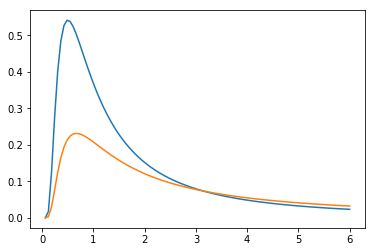

In [124]:
xs = np.linspace(0,6,100)
plt.plot(xs,tfd.InverseGamma(1.,1.).prob(xs.astype(np.float32)))
plt.plot(xs,tfd.InverseGamma(.5,1.).prob(xs.astype(np.float32)))

In [186]:
def star(f, *args, **kwargs):
    name = kwargs.get("name")
    if name == 'mixture_component_std':
        return np.column_stack([1e-10*np.ones(2, dtype='float32'), 10*np.ones(2,dtype='float32')])
    if name == 'mixture_weights':
        return np.column_stack([0.999*np.ones(2, dtype='float32'), 0.001*np.ones(2,dtype='float32')]).T
    if name == 'data_std':
        return 1e-10*np.ones((1,2), dtype='float32')
    if name == 'factor_loadings':
        return np.eye(2,dtype='float32')
    else:
        return f(*args,**kwargs)

In [215]:
def change_priors(f, *args, **kwargs):
    name = kwargs.get("name")
    if name == 'mixture_component_std':
        return ed.InverseGamma(concentration=.5, rate=.5, sample_shape=(n_sources,n_components_in_mixture), name='mixture_component_std')
    else:
        return f(*args,**kwargs)

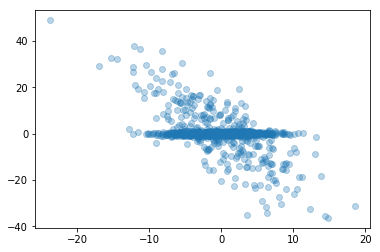

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[0.7235048 , 3.2875454 ],
       [0.35529158, 9.685942  ]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.00141454, 0.99858546],
       [0.71032506, 0.289675  ]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 0.50276977, -2.3708708 ],
       [ 2.7799764 ,  0.16022414],
       [ 2.029324  ,  0.25969464],
       ...,
       [ 3.264798  , -0.49590433],
       [-0.03587009, -0.22908033],
       [ 3.1007729 ,  0.14954314]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[ 0.82267535,  0.03679416],
       [-0.46624094,  1.4930161 ]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[2.758261 , 0.2311897]], dtype=float

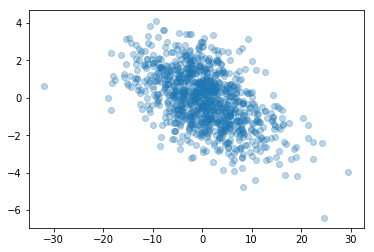

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[0.76710933, 0.4485479 ],
       [5.250621  , 2.3996124 ]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.5339703 , 0.4660297 ],
       [0.39355516, 0.60644484]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 1.1171428 ,  0.09118317],
       [ 0.31245983, -4.938666  ],
       [ 0.21806344,  2.2913177 ],
       ...,
       [-0.58656245, -2.3329253 ],
       [ 0.709827  ,  1.7572961 ],
       [-1.438807  , -1.7601426 ]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[-0.69252306,  0.21754576],
       [ 1.6678594 , -0.20393042]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[2.590968, 1.312353]], dtype=float32

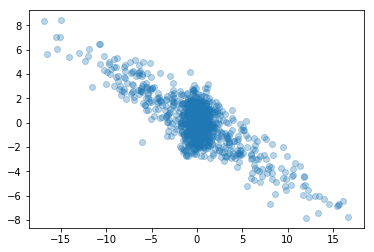

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[0.52971464, 0.792484  ],
       [8.8108    , 0.44765308]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.6887669 , 0.31123307],
       [0.42524877, 0.57475126]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 0.14736359,  0.7652985 ],
       [-0.5870673 , -3.9937246 ],
       [-0.5515374 ,  0.49048075],
       ...,
       [ 0.80832404,  0.22738056],
       [-1.2841288 , -0.0140139 ],
       [-0.57996726, -0.2975282 ]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[-1.1904472 , -0.22145773],
       [-0.7301427 ,  0.32146773]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[0.39497954, 1.0946451 ]], dtype=flo

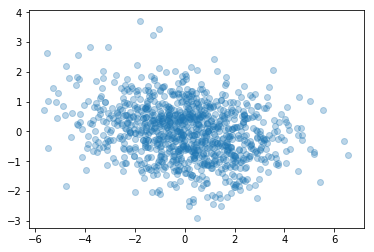

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[0.4993166 , 0.8346962 ],
       [0.60801274, 0.4066382 ]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.09019929, 0.9098007 ],
       [0.9044897 , 0.0955103 ]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[-1.7224649e-01,  1.8540799e-04],
       [-6.0369175e-02, -2.9688761e-01],
       [ 1.9718124e-01, -3.4966927e-02],
       ...,
       [ 3.3179786e-02,  3.0193365e-01],
       [ 1.5749264e+00,  4.0039456e-01],
       [ 1.8408494e-02,  1.0835869e+00]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[-1.1869719,  0.6598765],
       [ 1.1688402,  0.3619882]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[1.5

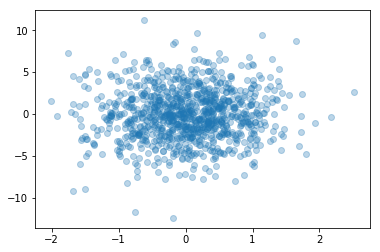

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[2.468209 , 0.4189508],
       [0.1436172, 0.3300978]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.16488361, 0.8351164 ],
       [0.19680418, 0.80319583]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[-0.098798  , -0.40338156],
       [-0.6731949 , -0.18309452],
       [-0.07354116, -0.01954583],
       ...,
       [-0.5153803 ,  0.21952064],
       [ 0.14299205, -0.14124566],
       [ 1.8910775 ,  0.09541612]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[-0.00467749, -1.0364707 ],
       [ 0.4404219 ,  1.8623149 ]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[0.68000627, 2.7394004 ]], dtype=float32

In [216]:
for i in range(5):
    with ed.interception(change_priors):
        with tape() as this_tape:
            model = centeredIndependentFactorAnalysis(n_components_in_mixture=2,n_sources=2,n_features=2)
            plt.scatter(*model.numpy().T,alpha=.3)
            plt.show()
        print(this_tape)

In [217]:
from map import *

SyntaxError: invalid syntax (map.py, line 36)